<a href="https://colab.research.google.com/github/pratikchaudhari64/notebooks/blob/main/pytorch_and_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [169]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


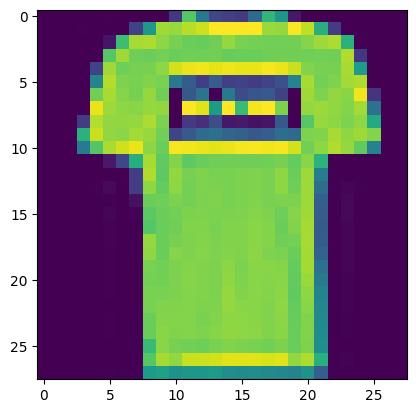

In [174]:
# Display the image ith image out of minibatch
i = 1
plt.imshow(train_minibatch[i])
plt.show()


## Basic forward pass.
 - **Input Layer**: training data had original tensor of (3,28,28) where the 28x28 matrix for each photo already has RGB encoded numbers. Then, flattened it out for each image to have 28*28 features (kinda,..) and then input is tensor (3,784)
 - **Hidden Layers**: layer1+relu; layer2+relu
 - **Output Layers**: (3,10) form tensor gets created first by introducing new linear layer (512, 10). Then, perform softmax to scale such that sum = 1(form probabilities), then finally test probability of your desired class (10 total classes returned with probability for each) against what it actually was

In [220]:
minibatch_size = 3

train_minibatch = training_data.data[:minibatch_size]

flattened_view = train_minibatch.view(3, 784).type(torch.float32)
print(f"final input: {flattened_view.size()}")                      # input photos get converted to numerical represenatation. One way to think
                                                                    # to think is that each image is now represented as 784 feature columns (size: 3x784)



layer1 = nn.Linear(in_features=28*28, out_features=512)
hidden1 = layer1(flattened_view)
hidden1_relu = nn.ReLU()(hidden1)
print(f"hidden1_relu: {hidden1_relu.size()}")                       # First mixing of weights along
                                                                    # with a ReLU (and oher things like batchnorm/dropouts etc.)

layer_2 = nn.Linear(512, 512)
hidden_2 = layer_2(hidden1_relu)
hidden_2_relu = nn.ReLU()(hidden_2)
print(f"hidden2_relu: {hidden_2_relu.size()}")                      # Second mixing of weights along
                                                                    # with a ReLU (and oher things like batchnorm/dropouts etc.)


layer_3 = nn.Linear(512, 10)
output = layer_3(hidden_2_relu)
print(f"output: {output.size()}")                                   # Finally converted to give pre-probabilities (think of these as counts)
                                                                    # for each class (which in turn we want to maximize)


softmax = nn.Softmax(dim=1)
probabilities = softmax(output)
print(f"probabilities: {probabilities.size()}")                     # counts found in previous example now got scaled to resemble probabilities
probabilities[0]





final input: torch.Size([3, 784])
hidden1_relu: torch.Size([3, 512])
hidden2_relu: torch.Size([3, 512])
output: torch.Size([3, 10])
probabilities: torch.Size([3, 10])


tensor([2.4122e-02, 3.6318e-04, 4.2993e-12, 2.3154e-10, 5.6651e-22, 1.6596e-14,
        9.6510e-01, 3.2184e-03, 7.1926e-03, 4.2734e-07],
       grad_fn=<SelectBackward0>)

In [216]:
lay = nn.Linear(in_features=784, out_features=20)
print(lay.weight.size())
print(lay.bias.size())


training_data.targets

torch.Size([20, 784])
torch.Size([20])


torch.Size([60000])